# Run Preprocess Session

This notebook runs the preprocessing pipeline from `src.preprocess`.

Workflow:
1. Select a remote session folder with a GUI dialog.
2. Prepare local output and copy `basename.xml`.
3. Build `chanMap.mat` from XML with probe assignments.
4. Run `run_preprocess_session(config)` (preprocess + sorting when `sorter` is set).
5. Sorting output folder is automatically named as `SorterName_YYYY-MM-DD_HHMMSS` (e.g. `Kilosort_2026-02-16_120658`).


In [ ]:
%reload_ext autoreload
%autoreload 2
from pathlib import Path

from src.preprocess import (
    PreprocessConfig,
    prepare_chanmap,
    run_preprocess_session,
    select_paths_with_gui,
    show_chanmap,
)


c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1) Select Basepath And Prepare XML (GUI)


In [ ]:
# Choose one mode:
# 1) GUI mode: use_gui=True
# 2) Manual mode: use_gui=False and set manual_basepath
use_gui = True
manual_basepath = None  # e.g. r'T:\\data\\AutoMaze\\RM010\\RM010_day43_20250925'

basepath, basename, local_output_dir, xml_path = select_paths_with_gui(
    use_gui=use_gui,
    manual_basepath=manual_basepath,
    initial_drive=r'S:\\',
    local_root=Path.cwd() / 'sorting_temp',
)

print('basepath      :', basepath)
print('basename      :', basename)
print('local_output  :', local_output_dir)
print('xml_path      :', xml_path)


basepath      : S:\data\theta_replay\Sake\sake_day23
basename      : sake_day23
local_output  : D:\PreprocessPipeline\sorting_temp\sake_day23
xml_path      : D:\PreprocessPipeline\sorting_temp\sake_day23\sake_day23.xml


## 2) Define Probe Assignments

`groups` are XML group indices (0-based).
`type` can be: `double_sided`, `staggered`, `poly3`, `poly5`, `NeuroPixel`, `neurogrid`.


In [ ]:
# Single double-sided probe example:
probe_assignments = [
    {'type': 'double_sided', 'groups': [0, 1, 2, 3, 4, 5, 6, 7], 'x_offset': 0},
]

probe_assignments


[{'type': 'double_sided', 'groups': [0, 1, 2, 3, 4, 5, 6, 7], 'x_offset': 0}]

## 3) Generate `chanMap.mat`


Successfully saved chanMap.mat to D:\PreprocessPipeline\sorting_temp\sake_day23\chanMap.mat
chanMap path           : D:\PreprocessPipeline\sorting_temp\sake_day23\chanMap.mat
bad channels (0-based) : [8, 10, 21, 26, 34, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


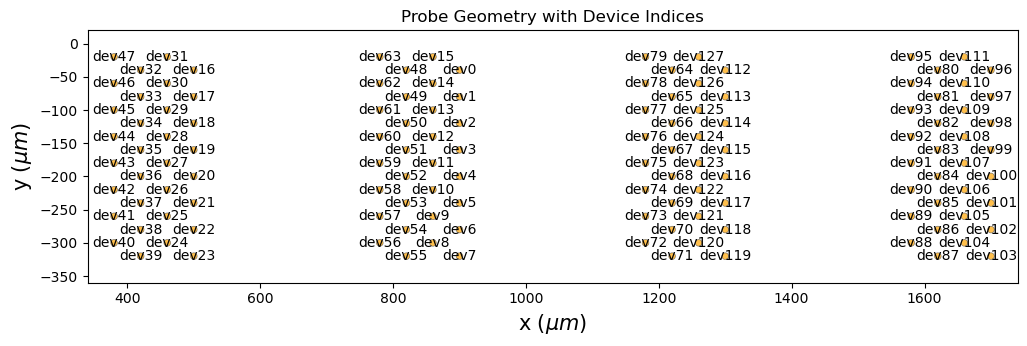

bad channels from plot : [8, 10, 21, 26, 34, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


In [ ]:
chanmap_path, bad_ch_ids = prepare_chanmap(
    basepath=basepath,
    basename=basename,
    local_output_dir=local_output_dir,
    probe_assignments=probe_assignments,
    reject_channels=[],
)

print('chanMap path           :', chanmap_path)
print('bad channels (0-based) :', bad_ch_ids)

# Visualize generated channel map (same style as Spike_sorting_KS1.ipynb)
bad_ch_ids_plot = show_chanmap(chanmap_path)
print('bad channels from plot :', bad_ch_ids_plot)


## 4) Build Preprocess Config


In [ ]:
pre_config = PreprocessConfig(
    basepath=basepath,
    localpath=local_output_dir.parent,

    sort_files=True,
    alt_sort=None,
    ignore_folders=[],

    do_preprocess=True,
    bandpass_min_hz=500.0,
    bandpass_max_hz=8000.0,
    reference='local',
    local_radius_um=(50.0, 200.0),

    make_lfp=True,
    lfp_fs=1250,

    analog_inputs=False,
    analog_channels=None,
    digital_inputs=False,
    digital_channels=None,

    chanmap_mat_path=chanmap_path,
    reject_channels=[],

    save_raw=False,
    export_intermediate_dat=True,

    sorter='Kilosort',
    sorter_path=Path('sorter') / 'KiloSort1',
    sorter_config_path=Path('sorter') / 'Kilosort1_config.yaml',
    # If matlab is not on PATH, set explicit executable path here:
    matlab_path=Path(r'C:\\Program Files\\MATLAB\\R2024b\\bin\\matlab.exe'),

    overwrite=False,
    save_params_json=True,
    save_manifest_json=True,
    save_log_mat=True,

    job_kwargs={
        'n_jobs': 32,
        'chunk_duration': '10s',
        'progress_bar': True,
    },
)

pre_config


PreprocessConfig(basepath=WindowsPath('S:/data/theta_replay/Sake/sake_day23'), localpath=WindowsPath('D:/PreprocessPipeline/sorting_temp'), output_dir=None, sort_files=True, alt_sort=None, ignore_folders=[], dtype='int16', gain_to_uV=0.195, offset_to_uV=0.0, do_preprocess=True, bandpass_min_hz=500.0, bandpass_max_hz=8000.0, reference='local', local_radius_um=(50.0, 200.0), make_lfp=True, lfp_fs=1250, analog_inputs=False, analog_channels=None, digital_inputs=False, digital_channels=None, chanmap_mat_path=WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/chanMap.mat'), reject_channels=[], save_raw=False, export_intermediate_dat=True, sorter='Kilosort', sorter_path=WindowsPath('sorter/KiloSort1'), sorter_config_path=WindowsPath('sorter/Kilosort1_config.yaml'), matlab_path=WindowsPath('C:/Program Files/MATLAB/R2024b/bin/matlab.exe'), save_params_json=True, save_manifest_json=True, save_log_mat=True, overwrite=False, job_kwargs={'n_jobs': 32, 'chunk_duration': '10s', 'progress_bar'

## 5) Run Preprocess


In [ ]:
from dataclasses import replace
from src import use_existing_sorting, make_post_recording, run_postprocess_session


do_sorting = False
existing_sorting_dir = None

runtime_config = pre_config if do_sorting else replace(pre_config, sorter=None, save_raw=True)
result = run_preprocess_session(runtime_config)

if not do_sorting:
    result = use_existing_sorting(
        result,
        sorter=pre_config.sorter,
        existing_sorting_dir=existing_sorting_dir,
    )
    recording_for_post = make_post_recording(result, pre_config)
else:
    recording_for_post = None

result


Found 128 amplifier channels.
Found 6 auxiliary input channels.
Found 0 supply voltage channels.
Found 0 board ADC channels.
Found 16 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensor channels.


PreprocessResult(basepath=WindowsPath('//132.236.112.15/ayadataB4/data/theta_replay/Sake/sake_day23'), basename='sake_day23', local_output_dir=WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23'), dat_path=WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/sake_day23.dat'), lfp_path=WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/sake_day23.lfp'), session_mat_path=WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/sake_day23.session.mat'), mergepoints_mat_path=WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/sake_day23.MergePoints.events.mat'), analog_event_paths=[], digital_event_paths=[], intermediate_dat_paths={'digitalin': WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/digitalin.dat'), 'auxiliary': WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/auxiliary.dat'), 'time': WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/time.dat')}, n_channels=128, sr=20000.0, sr_lfp=1250, bad_channels_0based=[8, 10, 21, 26

## 6) Quick Check


In [ ]:
print('local_output_dir      :', result.local_output_dir)
print('dat_path              :', result.dat_path)
print('lfp_path              :', result.lfp_path)
print('session_mat_path      :', result.session_mat_path)
print('mergepoints_mat_path  :', result.mergepoints_mat_path)
print('intermediate_dat_paths:', result.intermediate_dat_paths)
print('n_channels            :', result.n_channels)
print('sr                    :', result.sr)
print('sr_lfp                :', result.sr_lfp)
print('bad_channels_0based   :', result.bad_channels_0based)
print('sorter                :', result.sorter)
print('sorter_output_dir     :', result.sorter_output_dir)


local_output_dir      : D:\PreprocessPipeline\sorting_temp\sake_day23
dat_path              : D:\PreprocessPipeline\sorting_temp\sake_day23\sake_day23.dat
lfp_path              : D:\PreprocessPipeline\sorting_temp\sake_day23\sake_day23.lfp
session_mat_path      : D:\PreprocessPipeline\sorting_temp\sake_day23\sake_day23.session.mat
mergepoints_mat_path  : D:\PreprocessPipeline\sorting_temp\sake_day23\sake_day23.MergePoints.events.mat
intermediate_dat_paths: {'digitalin': WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/digitalin.dat'), 'auxiliary': WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/auxiliary.dat'), 'time': WindowsPath('D:/PreprocessPipeline/sorting_temp/sake_day23/time.dat')}
n_channels            : 128
sr                    : 20000.0
sr_lfp                : 1250
bad_channels_0based   : [8, 10, 21, 26, 34, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
sort

## 7) Run Postprocess
Runs postprocessing pipeline and exports `sorter_output_postprocessed` under each Kilosort run.


In [ ]:
from src import PostprocessConfig
if result.sorter_output_dir is None:
    raise RuntimeError("No sorter output found. Set result.sorter_output_dir first.")

sorting_phy_folder = Path(result.sorter_output_dir) / "sorter_output"

post_cfg = PostprocessConfig(
    sorting_phy_folder=sorting_phy_folder,

    # Input recording source (either recording OR dat_path)
    recording=recording_for_post,          # or None
    dat_path=result.dat_path,              # used when recording is None
    sampling_frequency=result.sr,
    num_channels=result.n_channels,
    dtype=pre_config.dtype,
    gain_to_uV=pre_config.gain_to_uV,
    offset_to_uV=pre_config.offset_to_uV,
    chanmap_mat_path=pre_config.chanmap_mat_path,
    reject_channels=pre_config.reject_channels,

    # Preprocess behavior when dat_path is used
    apply_preprocessing_if_dat=True,
    preprocess_recording_object=False,
    bandpass_min_hz=pre_config.bandpass_min_hz,
    bandpass_max_hz=pre_config.bandpass_max_hz,
    reference=pre_config.reference,
    local_radius_um=pre_config.local_radius_um,

    # Sorting read / dedup
    exclude_cluster_groups=["noise", "mua"],
    duplicate_censored_period_ms=0.5,
    duplicate_threshold=0.5,
    remove_strategy="max_spikes",

    # Analyzer cache
    # During processing, intermediate waveforms/PCs are stored in
    #   <KilosortDir>/sorter_output_postprocessed_analyzer_cache/
    # (separate from the Phy output folder to avoid Windows file-lock issues).
    # delete_analyzer_cache=True  → cache is deleted at the end (only Phy folder remains)
    # delete_analyzer_cache=False → cache is kept; set skip_curation=True to restart from cache
    analyzer_format="binary_folder",
    analyzer_cache_dir=None,
    delete_analyzer_cache=False,   # set False to keep cache when skip_curation=True
    skip_curation=False,           # True → skip dedup/merge/split and reuse cached split analyzer
    n_components=5,
    pc_mode="by_channel_local",

    # Merge
    merge_min_spikes=100,
    merge_corr_diff_thresh=0.25,
    merge_template_diff_thresh=0.25,
    merge_sparsity_overlap=0.5,
    merge_censor_ms=0.5,

    # Split
    split_contamination=0.05,
    split_threshold_mode="adaptive_chi2",
    split_min_clean_frac=0.9,
    split_relax_factor=0.5,
    split_use_waveform_gate=True,
    split_wf_threshold=0.3,
    split_wf_template_max=1000,
    split_wf_n_chans=10,
    split_wf_center="demean",
    split_squeeze_all_outlier_to_new=True,
    split_min_spikes=10,
    split_verbose=True,

    # Metrics
    metric_names=["isi_violation", "presence_ratio", "snr", "amplitude_median"],
    skip_pc_metrics=True,

    # Output
    output_folder_name="sorter_output_postprocessed",
    remove_if_exists=True,
    copy_binary=False,
    phy_hp_filtered=True,
    # use_relative_path: controls how dat_path is written in Phy's params.py.
    #   False → absolute path (safe across drives, recommended)
    #   True  → path relative to the output folder (portable if folder is moved together with dat)
    use_relative_path=False,
    metrics_csv_name="quality_metrics.csv",

    # dat_path written into Phy params.py:
    #   write_preprocessed_dat_for_phy=True  → a freshly exported filtered .dat is used
    #   force_params_dat_path=Path(...)      → explicit override
    #   otherwise (both None)               → dat_path above (basename.dat) is used automatically
    write_preprocessed_dat_for_phy=False,
    force_params_dat_path=None,

    # Noise labeling
    noise_thresholds={
        "isi_violations_ratio_gt": 3.0,
        "isi_violations_count_gt": 50.0,
        "presence_ratio_lt": 0.1,
        "snr_lt": 0.3,
        "amplitude_median_lt": 25.0,
    },
    noise_backup=False,

    # Parallel settings for postprocess
    # chunk_duration is important on Windows: prevents pipe overflow when spawning workers
    job_kwargs={
        "n_jobs": 32,
        "chunk_duration": "10s",
        "progress_bar": True,
    },
)


In [ ]:
post_result = run_postprocess_session(post_cfg)

[postprocess] start run_postprocess_session()
[postprocess] sorting_phy_folder=D:\PreprocessPipeline\sorting_temp\sake_day23\Kilosort_2026-02-17_005620\sorter_output
[postprocess] output_folder=D:\PreprocessPipeline\sorting_temp\sake_day23\Kilosort_2026-02-17_005620\sorter_output_postprocessed
[postprocess] analyzer_cache_dir=D:\PreprocessPipeline\sorting_temp\sake_day23\Kilosort_2026-02-17_005620\sorter_output_postprocessed_analyzer_cache
[postprocess] recording resolved
[postprocess] loading Phy sorting
[postprocess] loaded sorting: n_units=596, total_spikes=5445065
[postprocess] [skip_curation=True] loading existing 'split' analyzer – skipping dedup/merge/split


c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\spikeinterface\core\sortinganalyzer.py:2395: UserWarning: Found no run_info file for spike_amplitudes, extension should be re-computed.
  warnings.warn(f"Found no run_info file for {self.extension_name}, extension should be re-computed.")
c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\spikeinterface\core\sortinganalyzer.py:2478: UserWarning: Found no data for spike_amplitudes, extension should be re-computed.
  warnings.warn(f"Found no data for {self.extension_name}, extension should be re-computed.")
c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\spikeinterface\core\sortinganalyzer.py:2395: UserWarning: Found no run_info file for spike_locations, extension should be re-computed.
  warnings.warn(f"Found no run_info file for {self.extension_name}, extension should be re-computed.")
c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\spikeinterface\core\sortinganalyzer.py:2478: UserWarning: Found no data for spike_loca

[postprocess] computing quality metrics
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\IPython\core\interactiveshell.py", line 3701, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\aalab\AppData\Local\Temp\ipykernel_28164\786966092.py", line 1, in <module>
    post_result = run_postprocess_session(post_cfg)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\PreprocessPipeline\src\postprocess\pipeline.py", line 373, in run_postprocess_session
    metrics_df = sqm.compute_quality_metrics(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\spikeinterface\core\sortinganalyzer.py", line 2317, in __call__
    ext = sorting_analyzer.compute(cls.extension_name, *args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aalab\miniforge3\envs\phy2\Lib\site-packages\spikeinterface\core\sortinganalyzer.py", line 1659, in compute
    return